In [24]:
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

/var/folders/qk/vkzbpc2j6xvbsvb86fh7k35h0000gn/T/ipykernel_9755/2831644003.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()


/Users/rafaeldelimathomaz/Library/Python/3.8/lib/python/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [2]:
def shift_image(image, dx,dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dy,dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

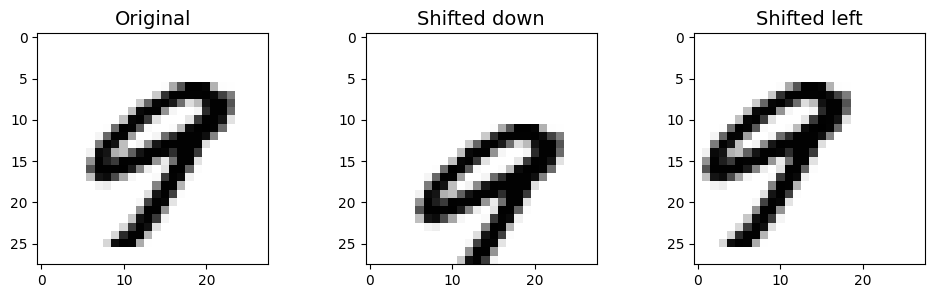

In [12]:
image = X_train[1005]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [14]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [16]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [20]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

knn_clf = KNeighborsClassifier(**grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time= 1.3min
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time= 1.3min
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time= 1.3min
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time= 1.3min
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time= 1.2min
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time= 1.2min
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time= 1.2min
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time= 1.2min
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time= 1.3min
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time= 1.3min
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time= 1.3min
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

In [21]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [25]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763

### By simply augmenting the data, we got a 0.5% accuracy boost. :)